### Import necessary libraries

In [69]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### load dataset and analyse

In [13]:
df = pd.read_csv("H:\\Guvi\Project\\Final project\\Project 1 (Twitter sentiment analysis)\\Try 2\\twitter_new.csv", encoding='latin-1', header= None)

In [14]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Since dataset has no column names, providing columns with name

In [16]:
df.columns = ['Target', 'id', 'tweet_date', 'flag', 'user', 'tweet_text']

In [17]:
df.head()

,Target,id,tweet_date,flag,user,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
df.tail()

,Target,id,tweet_date,flag,user,tweet_text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [19]:
df["Target"].unique()    ## checking unique values in target column 

array([0, 4], dtype=int64)

### Data preprocessing

Only target column and tweet_text is used for sentiment analysis, removing columns other than target and tweet_text

In [20]:
data = df[['Target', 'tweet_text']]      

In [21]:
data

,Target,tweet_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


### Text cleaning 

In [ ]:
def text_cleaning(tweet_text):
    cleaned_tweets = []
    for text in tweet_text:
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', text)   # Removing URLs
        tweet = re.sub("(@[A-Za-z0-9_]+)|(#\w+)", " ", tweet)  # Removing mentions and hashtags        
        tweet = re.sub('[^a-zA-Z]', ' ', tweet).lower()        # Removing non-alphabetical characters and lowercase conversion
        tweet = tweet.split()                                  # Tokenization and stemming while removing stopwords
        tweet = [PorterStemmer().stem(word) for word in tweet if word not in stopwords.words('english')]
        tweet = ' '.join(tweet)                                 
        cleaned_tweets.append(tweet)
    return cleaned_tweets

data['clean_tweets'] = text_cleaning(data['tweet_text'])

In [23]:
data.head()

,Target,tweet_text,clean_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav mad see


In [33]:
data.tail()

,Target,tweet_text,clean_tweets
1599995,4,Just woke up. Having no school is the best fee...,woke school best feel ever
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...,happi


In [34]:
data.shape

(1600000, 3)

In [26]:
data.to_csv("H:\\Guvi\\Project\\Final project\\Project 1 (Twitter sentiment analysis)\\Try 2\\processed_tweets.csv", index=False)

## Exploratory Data Analysis

Here the target variable is categorical which contains 0(Negative) and 4(Positive). Visualizing most occurred words in each negative and positive tweets. The word with bigger size occurred more often and decreases gradually.

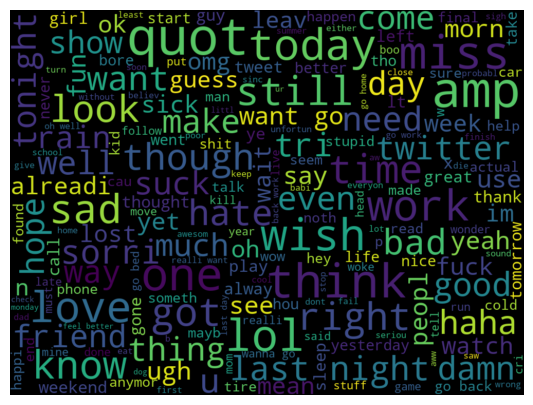

In [31]:
# Filter the DataFrame to select rows where 'Target' is equal to 0
selected_tweets = data[data['Target'] == 0]['clean_tweets']  
# Concatenate all the words in the selected tweets
all_words = ' '.join(selected_tweets)                     
# Generate the word cloud
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=100).generate(all_words)
# Create a plot to visualize the word cloud
plt.figure(figsize=(18, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

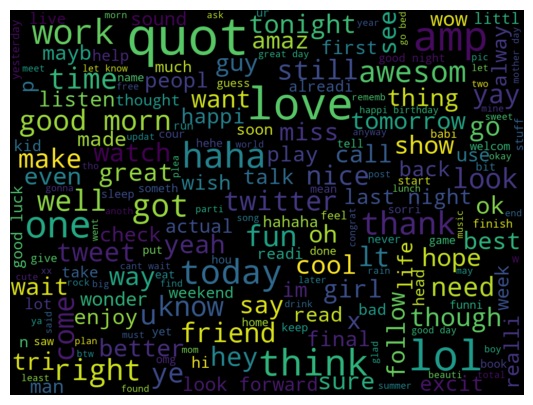

In [32]:
# Filter the DataFrame to select rows where 'Target' is equal to 4
selected_tweets = data[data['Target'] == 4]['clean_tweets']
# Concatenate all the words in the selected tweets
all_words = ' '.join(selected_tweets)
# Generate the word cloud
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=100).generate(all_words)
# Create a plot to visualize the word cloud
plt.figure(figsize=(18, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature selection and transformation

In [101]:
x = data['clean_tweets']
y = data['Target']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

In [103]:
# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(x_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [104]:
x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

## Model selection 

### Model-1 training 

In [105]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### Model-1 evaluation

In [106]:
y_pred = model.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_logistic)
print('Classification Report:')
print(classification_report1)
print('Confusion Matrix:')
print(confusion_matrix1)

Accuracy: 0.78866
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78    200276
           4       0.78      0.81      0.79    199724

    accuracy                           0.79    400000
   macro avg       0.79      0.79      0.79    400000
weighted avg       0.79      0.79      0.79    400000

Confusion Matrix:
[[154261  46015]
 [ 38521 161203]]


### Model-2 training and evaluation

In [107]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
y_pred2 = SVCmodel.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred2)
classification_report2 = classification_report(y_test, y_pred2)
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report2)
print('Confusion Matrix:')
print(confusion_matrix2)

Accuracy: 0.772105
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    200276
           4       0.76      0.79      0.78    199724

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000

Confusion Matrix:
[[151402  48874]
 [ 42284 157440]]


### Model-3 training and evaluation

In [108]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred3 = BNBmodel.predict(x_test)
accuracy_BernoulliNB = accuracy_score(y_test, y_pred3)
classification_report3 = classification_report(y_test, y_pred3)
confusion_matrix3 = confusion_matrix(y_test, y_pred3)
print('Accuracy:', accuracy_BernoulliNB)
print('Classification Report:')
print(classification_report3)
print('Confusion Matrix:')
print(confusion_matrix3)

Accuracy: 0.772945
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    200276
           4       0.76      0.80      0.78    199724

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000

Confusion Matrix:
[[149225  51051]
 [ 39771 159953]]


Since comparing accuracy score for 3 models , we conclude that logistic regression provides us with highest accuracy amongst the three.